<a href="https://colab.research.google.com/github/Nanaue9/BA820/blob/main/%E2%80%9Cassignment4_uber_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 4**

Name:Yanxu(Adam) Yang


### 1. Read the HBS Case. What is the difference between Uber POOL and Express POOL? No more than two sentences.

Uber carpooling works by picking up passengers heading in the same direction at designated locations and adding more passengers along the way. ExpressPOOL requires riders to wait up to two minutes for pairing time and then walk a short distance to a designated pickup point, but offers a discount of at least 20 percent for this inconvenience, which improves pairing efficiency and vehicle utilization.

### 2. How did Uber use surveys in designing Uber Express Pool? No more than two sentences.


Uber uses a joint survey to assess riders' willingness to wait and walk at different price points. Based on their findings, they built a calculator to predict price thresholds based on walking and waiting parameters and found that most people wouldn't wait 15 minutes, no matter how cheap it was.

### 3. Suppose Uber was considering a new algorithm to recommend ride destinations in the app. Which type of research strategy should they use (A/B Test, Switchback, Synthetic Control)? No more than two sentences.


Uber should have used user-level a /B experiments, because ride destination recommendations influence individual user behavior. This approach would allow Uber to randomly assign passengers to experimental and control groups, comparing how different destination recommendations affect user choice patterns without affecting the broader market equilibrium.

###  4. Create two new columns in the dataset that represent the total number of trips for both pool products and the profit from these products.

Note, the data is in the data folder and is called `wait_time_switchback_3.csv`



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/BA830/BA830 - Winter 2025/data/wait_time_switchback_3.csv')

df['total_trips'] = df['trips_pool'] + df['trips_express_pool']
df['profit'] = df['revenue'] - df['total_driver_payout_sr']
df.head()

,city_id,period_start,wait_time,treat,commute,trips_pool,trips_express_pool,rider_cancellations,total_driver_payout_sr,total_matches_sr,total_double_matches_sr,revenue,total_trips,profit
0,Boston,2/19/18 7:00,2 mins,False,True,1417,3252,256,34459.41163,3365,1479,46041.85585,4669,11582.44422
1,Boston,2/19/18 9:40,5 mins,True,False,1462,2364,201,29770.34982,2292,1279,32174.38133,3826,2404.03151
2,Boston,2/19/18 12:20,2 mins,False,False,1360,2189,115,27446.36736,2288,957,31042.59758,3549,3596.23022
3,Boston,2/19/18 15:00,5 mins,True,True,1977,3580,356,44992.45299,4040,2029,53747.43785,5557,8754.98486
4,Boston,2/19/18 17:40,2 mins,False,False,1368,2575,187,27582.95530,2193,975,32799.79836,3943,5216.84306


###  5. Plot the average number of trips as a function of the time of the day. Describe a reason why this pattern exists (no more than 2 sentences). (20 points)


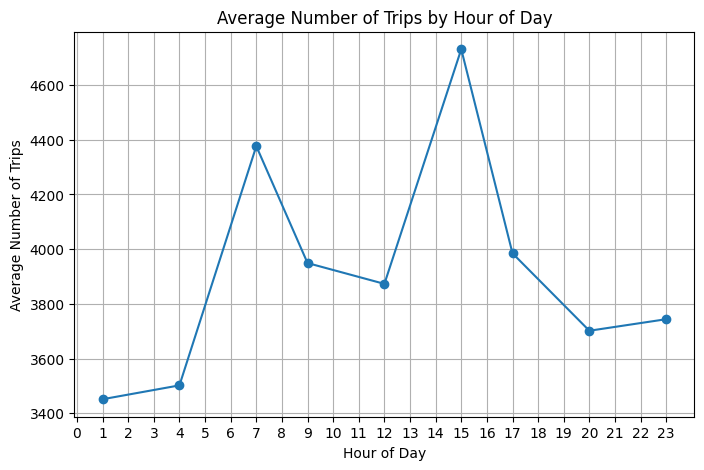

In [ ]:
import matplotlib.pyplot as plt

df['period_start'] = pd.to_datetime(df['period_start'])
df['hour'] = df['period_start'].dt.hour
df['total_trips'] = df['trips_pool'] + df['trips_express_pool']

avg_trips = df.groupby('hour')['total_trips'].mean()

plt.figure(figsize=(8, 5))
plt.plot(avg_trips.index, avg_trips.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Number of Trips by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Due to commute time standards, demand typically peaks in the morning and late afternoon. It falls in the middle of the day and late at night, reflecting normal human activity.

###  6. Conduct a regression analysis of the experiment (considering the outcomes: revenue, total_driver_payout_sr, rider_cancellations, total_trips). Make sure to think carefully about the correct regression specification. The regression output should be easy to read, so use ‘stargazer’. What do you learn in words from this regression analysis (no more than 5 sentences but it can be less)?


In [ ]:
!pip install stargazer

import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# Example: Ensure df is your DataFrame with the listed columns
# df = pd.read_csv("path_to_your_data.csv")

# Convert period_start to datetime if not already
df['period_start'] = pd.to_datetime(df['period_start'])
df['hour'] = df['period_start'].dt.hour

# 1. Regression for revenue
model_revenue = smf.ols(
    formula='revenue ~ treat + commute + C(city_id) + C(hour)',
    data=df
).fit()

# 2. Regression for total driver payout
model_driver = smf.ols(
    formula='total_driver_payout_sr ~ treat + commute + C(city_id) + C(hour)',
    data=df
).fit()

# 3. Regression for rider cancellations
model_cancel = smf.ols(
    formula='rider_cancellations ~ treat + commute + C(city_id) + C(hour)',
    data=df
).fit()

# 4. Regression for total trips
model_trips = smf.ols(
    formula='total_trips ~ treat + commute + C(city_id) + C(hour)',
    data=df
).fit()

# Create a Stargazer table
stargazer = Stargazer([model_revenue, model_driver, model_cancel, model_trips])
stargazer.title("Experiment Regression Results")
stargazer.custom_columns(["Revenue", "Driver Payout", "Cancellations", "Total Trips"], [1,1,1,1])
stargazer.show_degrees_of_freedom(False)
stargazer.covariate_order(["Intercept", "treat", "commute"])

# Print or display the HTML table
print(stargazer.render_html())

AssertionError: Covariate order must contain subset of existing covariates: {'commute', 'treat'} are not.

In [ ]:
print(model_revenue.params.index)

Index(['Intercept', 'treat[T.True]', 'commute[T.True]', 'C(hour)[T.4]',
       'C(hour)[T.7]', 'C(hour)[T.9]', 'C(hour)[T.12]', 'C(hour)[T.15]',
       'C(hour)[T.17]', 'C(hour)[T.20]', 'C(hour)[T.23]'],
      dtype='object')


###  7. One of your data scientists suggests that the optimal wait time may differ by whether it’s a commuting period. Test whether the effects of a 5 minute wait period on total trips and cancelations differ by whether it’s a commuting period (the column 'commute'). Which policy works better during commute times? (10 points)
